# Movie Recommendation System 

The most common types of recommendation systems are content based and collaborative filtering recommender systems. In collaborative filtering the behavior of a group of users is used to make recommendations to other users. Recommendation is based on the preference of other users. A simple example would be recommending a movie to a user based on the fact that their friend liked the movie.There are two types of collaborative models Memory-based methods and Model-based methods.The advantage of memory-based techniques is that they are simple to implement and the resulting recommendations are often easy to explain. They are divided into two:
User-based collaborative filtering: In this model products are recommended to a user based on the fact that the products have been liked by users similar to the user. For example if Derrick and Dennis like the same movies and a new movie comes out that Derick likes,then we can recommend that movie to Dennis because Derrick and Dennis seem to like the same movies.
Item-based collaborative filtering: These systems identify similar items based on users’ previous ratings. For example if users A,B and C gave a 5 star rating to books X and Y then when a user D buys book Y they also get a recommendation to purchase book X because the system identifies book X and Y as similar based on the ratings of users A,B and C.
Model-based methods are based on matrix factorization and are better at dealing with sparsity. They are developed using data mining, machine learning algorithms to predict users’ rating of unrated items. In this approach techniques such as dimensionality reduction are used to improve the accuracy. Examples of such model-based methods include decision trees, rule-based models, Bayesian methods and latent factor models.
Content based systems use meta data such as genre, producer, actor, musician to recommend items say movies or music. Such a recommendation would be for instance recommending Infinity War that featured Vin Disiel because someone watched and liked The Fate of the Furious. Similarly you can get music recommendations from certain artists because you liked their music. Content based systems are based on the idea that if you liked a certain item you are most likely to like something that is similar to it.

Now Here we are using item based collaborative filtering

In [1]:
import pandas as pd #importing the required module

In [2]:
df = pd.read_csv(r"G:\Python Programs\Recomendation system\rating_data\rating1.csv").drop("Unnamed: 0",axis = 1) #importing the dataset

this dataset contains userid, movieid, rating of a particular movie

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


it would be nice to see names of the movie also instead of working with numbers only

In [4]:
titles = pd.read_csv(r"G:\Python Programs\Recomendation system\movies.csv") #importing the movies dataset

In [5]:
titles.drop("genres",axis = 1,inplace = True) #we dont need genres of the movies here so we are deleting the genres column 

In [6]:
titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


Now, we have to merge both the datasets in order to see the movie names and their id 

In [7]:
df = pd.merge(df,titles,on="movieId") #since in both datasets "movieId" is common so we are merging both the datasets on "movieId"

In [8]:
df.head()

,userId,movieId,rating,timestamp,title
0,1,2,3.5,1112486027,Jumanji (1995)
1,5,2,3.0,851527569,Jumanji (1995)
2,13,2,3.0,849082742,Jumanji (1995)
3,29,2,3.0,835562174,Jumanji (1995)
4,34,2,3.0,846509384,Jumanji (1995)


Now, we will create a dataset that contains average rating of a movie and no: of ratings of a movie. This dataset will be used to set a threshold when we recommend a movie, it possible that a movie get 5 start rating but only by 1 user so it is necessary to set a threshold value

this can be done by a function called "groupby" present in "Pandas"

In [9]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())

In [10]:
ratings.head()

,rating
title,
'Til There Was You (1997),3.000
"'burbs, The (1989)",2.875
'night Mother (1986),5.000
(500) Days of Summer (2009),4.200
*batteries not included (1987),4.000


In [11]:
ratings["No_of_rating"]=df.groupby("title")["rating"].count()

In [12]:
ratings.head()

,rating,No_of_rating
title,,
'Til There Was You (1997),3.000,1
"'burbs, The (1989)",2.875,4
'night Mother (1986),5.000,1
(500) Days of Summer (2009),4.200,5
*batteries not included (1987),4.000,2


From the Below histogram you can see that avg rating of most of the movies lies between 3 to 4

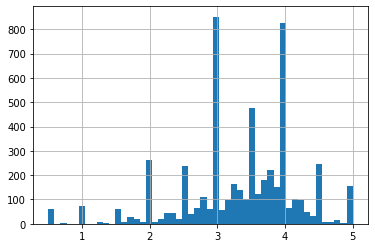

In [13]:
ratings["rating"].hist(bins = 50)

And from below histogram you can see that most of the movies are rated by only 0-20 users

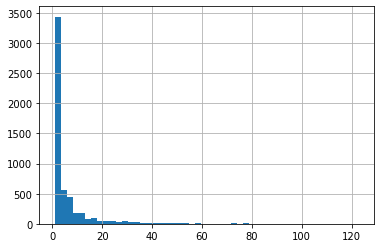

In [15]:
ratings["No_of_rating"].hist(bins = 50)

In [16]:
import seaborn as sns

from the below scatter graph you can see the relationship between avg rating and no: of ratins of a particular movie,
as the no: of rating of a movie increses it's average rating also increases

It depicts that there is relationship between no: of ratings and avg rating of a movie

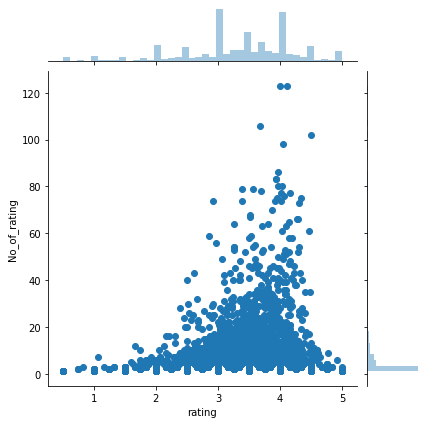

In [19]:
sns.jointplot(x = "rating",y = "No_of_rating",data = ratings) #it is used to see he relationship between 2 elements

Now we will create a simple item based recommendor system by finding the correlation between the rating of the movie of which we want to get recommendations with all the movies

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. Movies that have a high correlation coefficient are the movies that are most similar to each other. In our case we shall use the Pearson correlation coefficient. This number will lie between -1 and 1. 1 indicates a positive linear correlation while -1 indicates a negative correlation. 0 indicates no linear correlation. Therefore movies with a zero correlation are not similar at all.

For doing this we first create a matrix with movie titles as columns and userId as index and each colun represents all the rating of a particular movie and "NaN" means that particular movie is not rated by that user. This matrix can be made by a function named "pivot_table" present in pandas

In [20]:
movie_mat = df.pivot_table(values = "rating",index = "userId",columns = "title")

In [21]:
movie_mat.head()

title,'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),...,Zeus and Roxanne (1997),Zodiac (2007),Zombieland (2009),Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let us consider we want to see movies related to "Pulp Fiction (1994)"

In [23]:
pulp = movie_mat["Pulp Fiction (1994)"]

In [24]:
pulp.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Pulp Fiction (1994), dtype: float64

Here we are finding the correlation of the movie "Pulp Fiction (1994)" with all the movies

In [25]:
similar = movie_mat.corrwith(pulp)

c:\users\hellimax\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\hellimax\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Here we can see that different movies have different correlations
here 1 means positive relation, -1 means negative relation and NaN means no relation

In [26]:
similar

title
'Til There Was You (1997)                                                        NaN
'burbs, The (1989)                                                         -1.000000
'night Mother (1986)                                                             NaN
(500) Days of Summer (2009)                                                -1.000000
*batteries not included (1987)                                                   NaN
...And Justice for All (1979)                                                    NaN
10 Things I Hate About You (1999)                                          -0.246473
10,000 BC (2008)                                                                 NaN
100 Girls (2000)                                                                 NaN
101 Dalmatians (1996)                                                      -0.270604
101 Dalmatians (One Hundred and One Dalmatians) (1961)                      0.519904
102 Dalmatians (2000)                                      

Here we are filtering the movies that have relationship of more then 0.8 shold be shown in decending order

In [27]:
similar[similar>0.8].sort_values(ascending = False).head(10)

title
13 Ghosts (1960)                                                                    1.0
Perfect Blue (1997)                                                                 1.0
Producers, The (2005)                                                               1.0
Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)                         1.0
Prince of Tides, The (1991)                                                         1.0
Halloween H20: 20 Years Later (Halloween 7: The Revenge of Laurie Strode) (1998)    1.0
Police Academy 6: City Under Siege (1989)                                           1.0
Plunkett & MaCleane (1999)                                                          1.0
Planet Terror (2007)                                                                1.0
Pink Panther, The (1963)                                                            1.0
dtype: float64

In [28]:
recommended_movies = pd.DataFrame(similar[similar>0.8].sort_values(ascending = False))

In [29]:
recommended_movies.dropna(inplace = True) #deleting the null values

In [30]:
recommended_movies.reset_index(inplace=True) #resetting the index

In [30]:
recommended_movies.drop(0,axis = 1)

,title
0,13 Ghosts (1960)
1,Perfect Blue (1997)
2,"Producers, The (2005)"
3,"Aguirre: The Wrath of God (Aguirre, der Zorn G..."
4,"Prince of Tides, The (1991)"
5,Halloween H20: 20 Years Later (Halloween 7: Th...
6,Police Academy 6: City Under Siege (1989)
7,Plunkett & MaCleane (1999)
8,Planet Terror (2007)
9,"Pink Panther, The (1963)"
